# K-Means Clustering

In [105]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import operator
from scipy import ndimage
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

## load and visualize data

In [4]:
data=loadmat("ex7data2.mat")

In [5]:
X = data["X"]

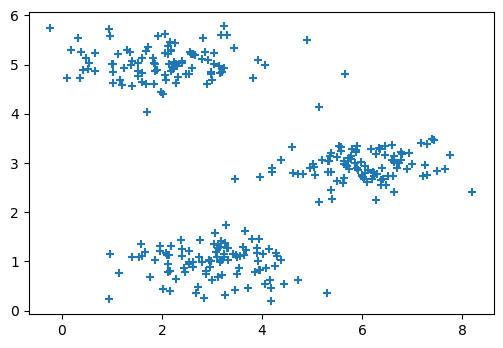

In [6]:
plt.figure(dpi=100)
plt.scatter(X[:,0],X[:,1],marker ="+")
plt.show()

## Finding closest centroids

<img src="k_means_find_closest_centroid.PNG" width="400" height="200">

In [7]:
def findClosestCentroids(X, centroids):
    # Set K
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0]).reshape(-1,1)
    m = X.shape[0]
    for i in range(m):
        distance_array = np.zeros((K))
        for j in range(K):
            distance = np.sqrt(np.sum((X[i] - centroids[j])**2))
            distance_array[j] = distance
        min_index, min_value = min(enumerate(distance_array), key=operator.itemgetter(1))
        idx[i] = min_index+1
    return idx        

In [8]:
K = 3   # 3 Centroids
initial_centroids = np.array([[3,3] , [6,2], [8,5]])

In [9]:
idx = findClosestCentroids(X, initial_centroids)

## Computing centroid means

<img src="k_means_compute_centroid_means.PNG" width="400" height="200">

In [10]:
def computeCentroids(X, idx, K):
    m, n = [X.shape[0], X.shape[1]]
    centroids = np.zeros((K, n));
    data = np.append(X,idx,axis=1)
    for i in range(K):
        centroids[i:,] = np.mean(data[data[:,n]==i+1],axis=0)[:n]
    return centroids

In [11]:
centroids = computeCentroids(X, idx, K)

## K-means on example dataset

In [12]:
def plotProgresskMeans(X, centroids, idx, K, i):
    data_kmeans = np.append(X,idx,axis=1)
    one = (data_kmeans[:,2]==1)
    two = (data_kmeans[:,2]==2)
    three = (data_kmeans[:,2]==3)
    plt.figure(dpi=100)
    plt.scatter(X[:,0].reshape(-1,1)[one],X[:,1].reshape(-1,1)[one],marker ="+",c="b")
    plt.scatter(X[:,0].reshape(-1,1)[two],X[:,1].reshape(-1,1)[two],marker ="+",c="g")
    plt.scatter(X[:,0].reshape(-1,1)[three],X[:,1].reshape(-1,1)[three],marker ="+",c="y")
    plt.scatter(centroids[0][0],centroids[0][1],c="r")
    plt.scatter(centroids[1][0],centroids[1][1],c="r")
    plt.scatter(centroids[2][0],centroids[2][1],c="r")
    plt.title("Iteration number: {}".format(i))
    plt.show()

## run k-means

In [13]:
def runkMeans(X, initial_centroids, max_iters,K,plot=True):
    m, n = X.shape[0], X.shape[1]
    centroids = initial_centroids
    idx = np.zeros((m, 1))
    for i in range(max_iters):
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X, idx, K)
        if plot==True:
            plotProgresskMeans(X, centroids, idx, K, i)
    return centroids, idx        

In [14]:
max_iters = 10
initial_centroids = np.array([[3,3] , [6,2], [8,5]])

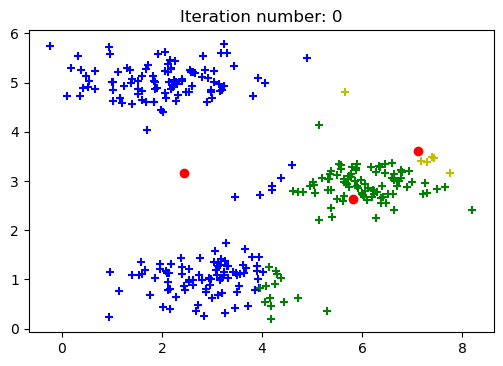

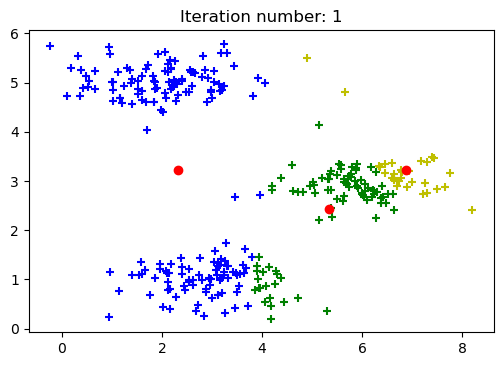

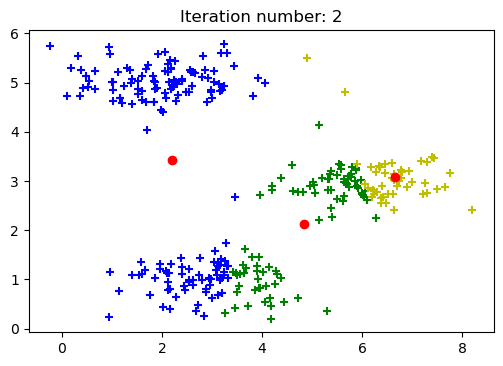

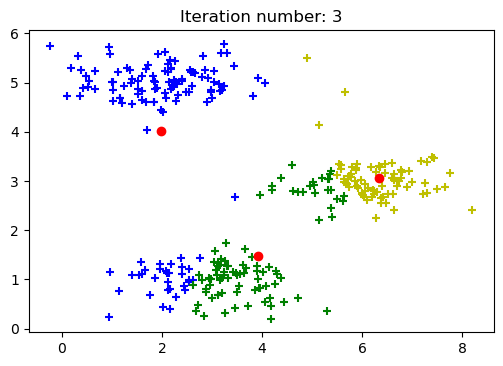

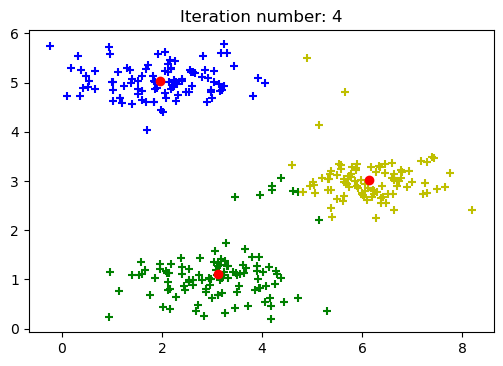

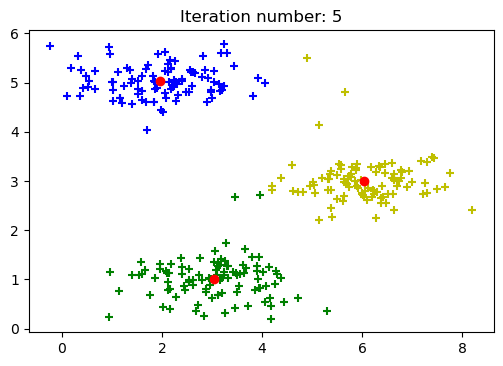

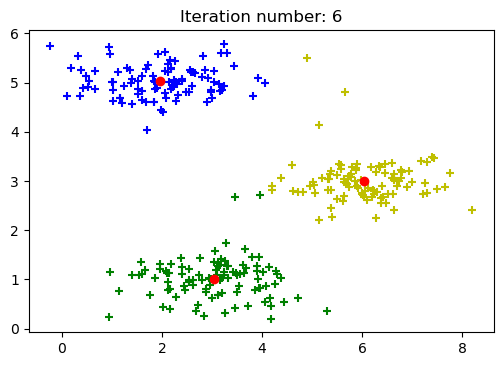

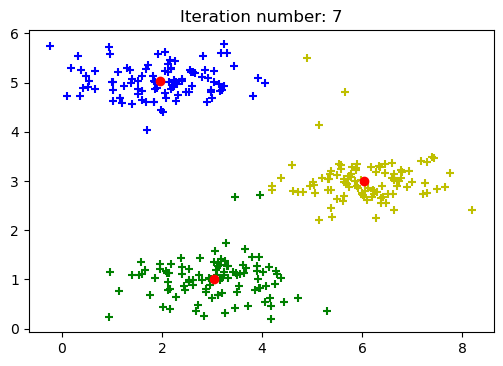

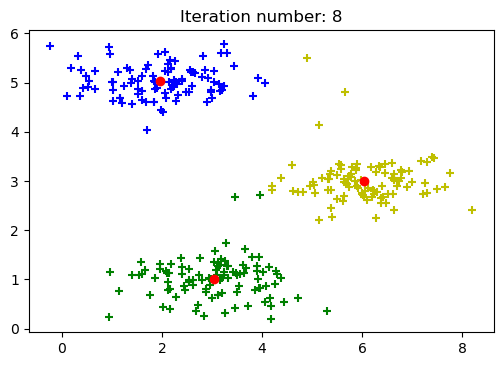

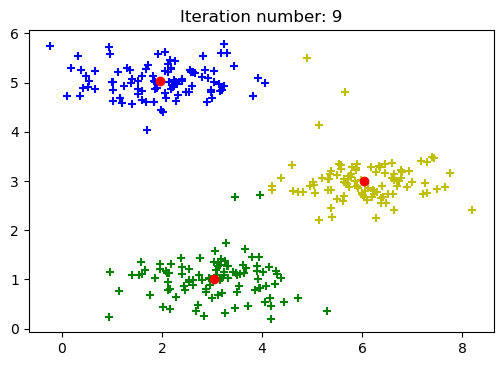

In [15]:
centroids, idx = runkMeans(X, initial_centroids, max_iters,K,plot=True)

## Random initialization

In [16]:
np.random.shuffle(X) #shuffle X array
initial_centroids_random = X[0:K] # select first 3 value as centroids

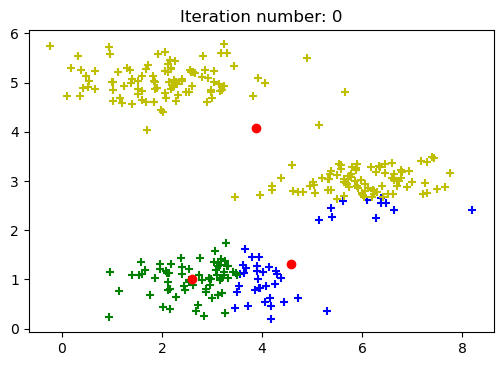

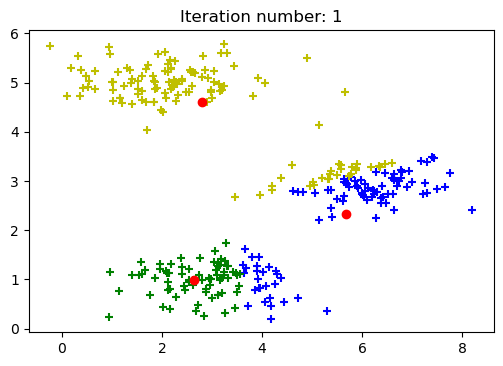

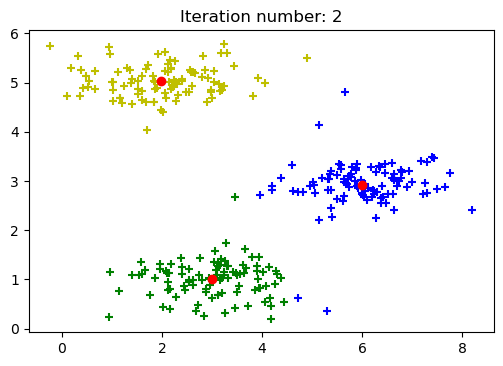

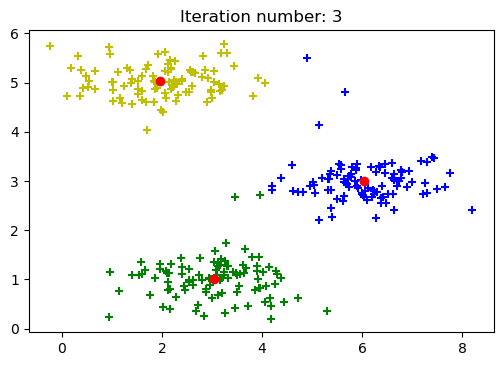

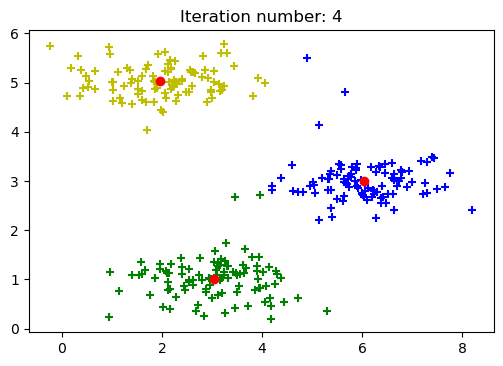

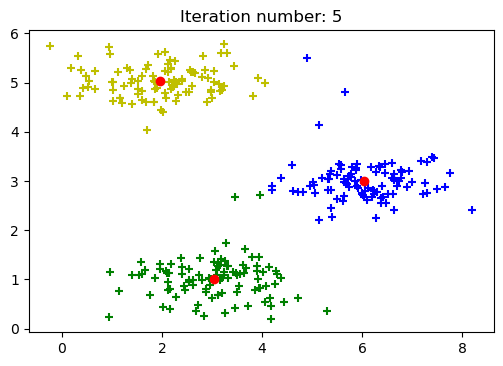

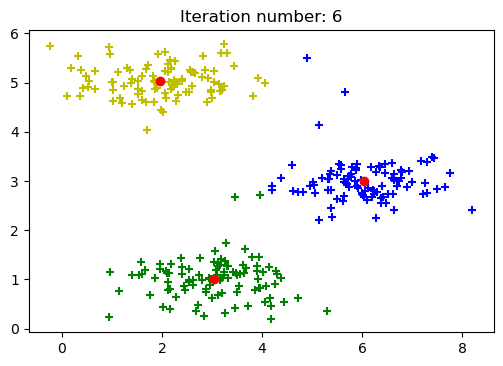

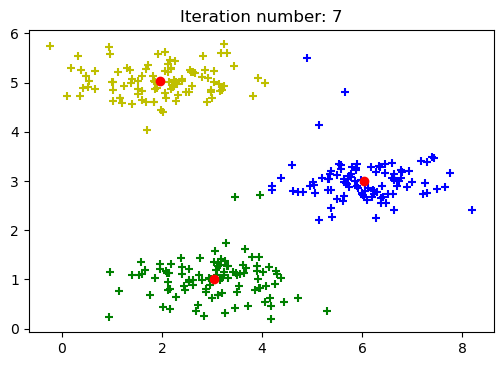

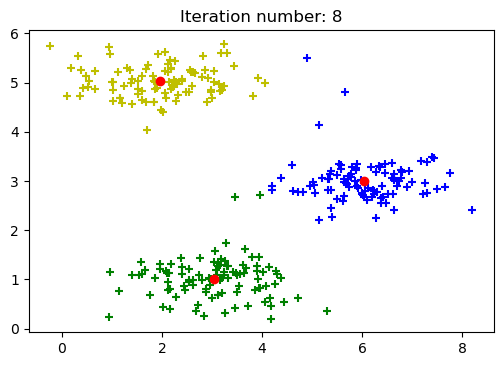

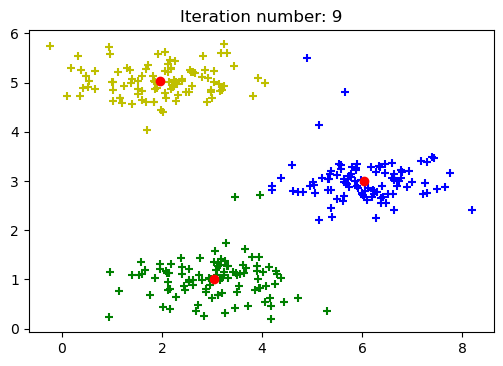

In [17]:
centroids, idx = runkMeans(X, initial_centroids_random, max_iters,K, plot=True)

# Image compression with K-means

In [18]:
A = loadmat('bird_small.mat')

In [19]:
A= A["A"]/255

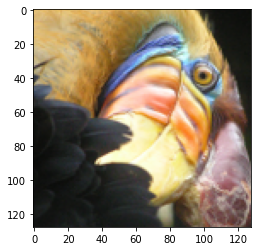

In [20]:
plt.imshow(A)
plt.show()

In [21]:
image_size = A.shape #size of image

In [22]:
image_size

(128, 128, 3)

In [23]:
X = np.reshape(A, (image_size[0] * image_size[1], 3))

In [24]:
X_shuffle = X.copy()

In [25]:
K = 16
max_iters = 10

In [26]:
def kMeansInitCentroids(X_shuffle, K):
    np.random.shuffle(X_shuffle) #shuffle X array
    initial_centroids_random = X_shuffle[0:K] # select first K value as centroids
    return initial_centroids_random

In [27]:
initial_centroids = kMeansInitCentroids(X_shuffle, K)

In [28]:
centroids, idx = runkMeans(X, initial_centroids, max_iters, K,  plot=False)

# Find closest cluster members

In [29]:
idx = findClosestCentroids(X, centroids)

In [30]:
X_recovered = np.zeros(((len(idx),3)))
for i in range (1,K+1):
    X_recovered[(idx==i).ravel(),:] = centroids[i-1]

In [31]:
X_recovered = X_recovered.reshape(image_size[0],image_size[1],3)

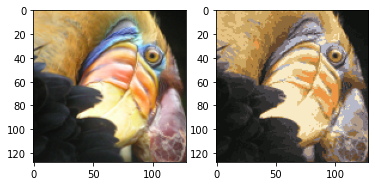

In [32]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(A)
ax[1].imshow(X_recovered)

# Principal Component Analysis

In [33]:
data=loadmat("ex7data1.mat")

In [34]:
X = data["X"]

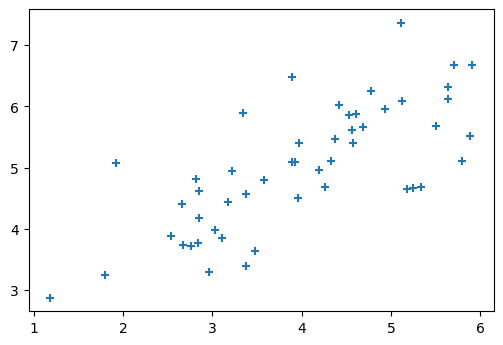

In [35]:
plt.figure(dpi=100)
plt.scatter(X[:,0],X[:,1],marker ="+")
plt.show()

## Implementing PCA

In [36]:
def featureNormalize(X):
    # Normalizes the features in X 
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0) 
    normalized = (X - mean) / std 
    return normalized, mean

In [37]:
X_norm, mu = featureNormalize(X)

In [38]:
def pca(X):
    #Run principal component analysis on the dataset X
    m, n = X.shape[0], X.shape[1]
    U = np.zeros(n)
    S = np.zeros(n)
    covariance_matrix = (1/m) * X.T @ X
    eigen_values = np.linalg.eig(covariance_matrix)[0]
    eigen_vector = np.linalg.eig(covariance_matrix)[1:]
    
    return eigen_values,eigen_vector

In [39]:
eigen_value, eigen_vector = pca(X_norm)

### Draw the eigenvectors centered at mean of data. These lines show the directions of maximum variations in the dataset

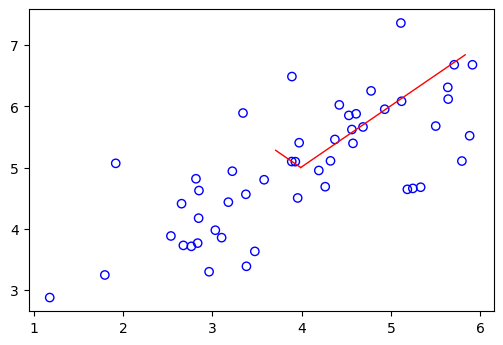

In [40]:
plt.figure(dpi=100)
plt.scatter(X[:,0],X[:,1],marker ="o",facecolors="none",edgecolors="b")
plt.plot([mu[0], (mu + 1.5 * eigen_value[0] * eigen_vector[0][:,0].T)[0]],[mu[1],(mu + 1.5 * eigen_value[0] * eigen_vector[0][:,0].T)[1]] ,linewidth =1 , color ="r" )
plt.plot([mu[0], (mu + 1.5 * eigen_value[1] * eigen_vector[0][:,1].T)[0]],[mu[1],(mu + 1.5 * eigen_value[1] * eigen_vector[0][:,1].T)[1]] ,linewidth =1 , color ="r" )
plt.show()

In [41]:
print("Top eigenvector U(:,1) = {} {} \n".format(eigen_vector[0][0,0], eigen_vector[0][1,0] ))

Top eigenvector U(:,1) = 0.7071067811865477 0.7071067811865474 



## Dimensionality reduction with PCA

## Projecting the data onto the principal components

In [42]:
def projectData(X, U, K):
    # Computes the reduced data representation when projecting only on to the top k eigenvectors
    Z = np.zeros((X.shape[0], K))
    for i in range(X.shape[0]):
        for j in range(K):
            x = X[i,:]
            projection_k = x.T @ eigen_vector[0][:,j]
            Z[i,j] = projection_k
    return Z        

In [43]:
K = 1

In [44]:
Z = projectData(X_norm, eigen_vector, K);

In [45]:
print('Projection of the first example: \n', Z[0]);

Projection of the first example: 
 [-1.49631261]


In [46]:
Z.reshape(len(Z),)

array([-1.49631261,  0.92218067, -1.22439232, -1.64386173, -1.2732206 ,
        0.97681976, -1.26881187,  2.34148278,  0.02999141,  0.78171789,
        0.6316777 ,  0.55280135,  0.0896816 ,  0.5258541 , -1.56415455,
        1.91610366,  0.88679735, -0.95607375,  2.32995679,  0.47793862,
        2.21747195, -0.38900633,  1.78482346, -0.05175486, -1.66512392,
       -0.50813572,  1.23711018,  1.17198677, -0.84221686,  0.00693174,
        0.22794195,  1.51309518, -1.33874082,  0.5925244 , -0.67907605,
        1.35298   , -1.68749495,  1.39235931, -2.55992598,  0.27850702,
        0.97677692, -0.88820006, -1.29666127,  0.98966774, -1.81272352,
        0.27196356, -3.19297722, -1.21299151, -0.36792871,  1.44264131])

## Reconstructing an approximation of the data

In [47]:
def recoverData(Z, U, K):
    # Recovers an approximation of the original data when using the projected data
    X_rec = np.zeros((Z.shape[0], U[0].shape[0]))
    for i in range(Z.shape[0]):
        for j in range(U[0].shape[0]):
            v = Z[i,:].T
            recovered_j = v.T @ U[0][j,0:K].T
            X_rec[i,j] = recovered_j.T
    return X_rec

In [48]:
X_rec  = recoverData(Z, eigen_vector, K)

### Visualizing the projections

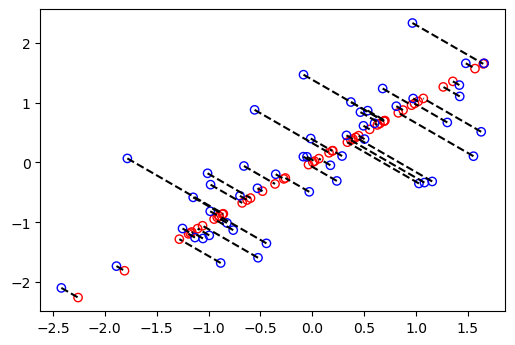

In [49]:
# The projection effectively only retains the information in the direction given by 
plt.figure(dpi=100)
plt.scatter(X_rec[:,0],X_rec[:,1],marker ="o",facecolors="none",edgecolors="r")
plt.scatter(X_norm[:,0],X_norm[:,1],marker ="o",facecolors="none",edgecolors="b")
for i in range(X_norm.shape[0]):
    plt.plot([X_norm[i,0], X_rec[i,0]],[X_norm[i,1], X_rec[i,1]], '--k');
plt.show()

# Face image dataset

In [50]:
data=loadmat("ex7faces.mat")

In [51]:
X = data["X"]

In [52]:
X = X.reshape(5000,32,32,1,order="F")

In [53]:
X.shape

(5000, 32, 32, 1)

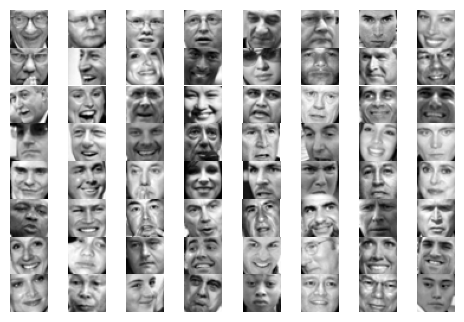

In [54]:
fig = plt.figure(dpi=100)
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(X[i].reshape(32,32), cmap='gray')
    plt.axis('off')
plt.subplots_adjust(hspace = 0, wspace= 0)
plt.show()

### PCA on faces

In [55]:
X_norm = X.reshape(5000,(X.shape[1]*X.shape[2]))

In [56]:
X_norm, mu = featureNormalize(X_norm)

In [57]:
X_norm.shape

(5000, 1024)

In [58]:
eigen_value , eigen_vector = pca(X_norm)

In [59]:
U_reduced = eigen_vector[0].T

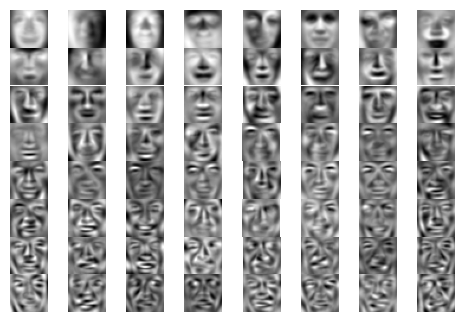

In [60]:
fig = plt.figure(dpi=100)
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(U_reduced[i].reshape(32,32), cmap='gray')
    plt.axis('off')
plt.subplots_adjust(hspace = 0, wspace= 0)
plt.show()

In [61]:
K = 100
Z = projectData(X_norm, eigen_vector, K)

In [62]:
print('The projected data Z has a size of: {} x {}'.format(Z.shape[0],Z.shape[1]))

The projected data Z has a size of: 5000 x 100


In [63]:
X_rec  = recoverData(Z, eigen_vector, K)

### original faces

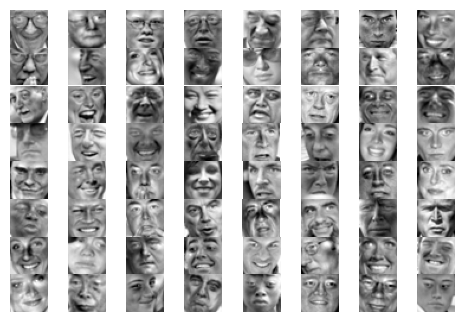

In [64]:
fig = plt.figure(dpi=100)
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(X_norm[i].reshape(32,32), cmap='gray')
    plt.axis('off')
plt.subplots_adjust(hspace = 0, wspace= 0)
plt.show()

## recovered faces 

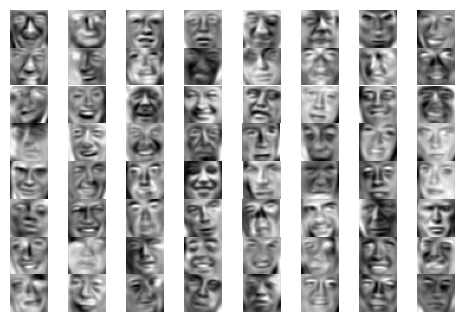

In [65]:
fig = plt.figure(dpi=100)
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(X_rec[i].reshape(32,32), cmap='gray')
    plt.axis('off')
plt.subplots_adjust(hspace = 0, wspace= 0)
plt.show()

## Optional (ungraded) exercise: PCA for visualization 

In [66]:
A = plt.imread('bird_small.png');

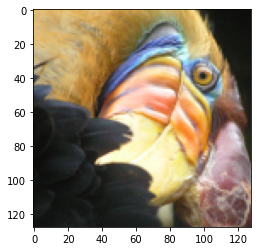

In [67]:
plt.imshow(A)

In [68]:
X = np.reshape(A, (128 * 128, 3));

In [69]:
K = 16;
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters, K, plot= False);

In [70]:
# Sample 1000 random indexes (since working with all the data istoo expensive. 
# If you have a fast computer, you may increase this.

In [71]:
X_visualize = np.append(X,idx,axis=1)
X_visualize_1000 = X_visualize[:1000,:]
X_visualize_1000 = pd.DataFrame(X_visualize_1000,columns=["x","y","z","c"])
X_visualize_1000["c"]= X_visualize_1000["c"].astype(str)

## visualize 2d classes

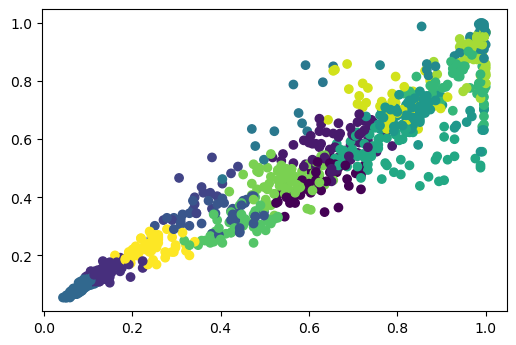

In [104]:
plot_color = pd.DataFrame()
plot_color["c"] = X_visualize_1000["c"]
plot_color = np.array(plot_color)
plt.figure(dpi=100)
plt.scatter(x=X_visualize_1000["x"], y=X_visualize_1000["y"], 
                     c=plot_color)
plt.show()

### visualize 3d classes

In [106]:
fig = px.scatter_3d(X_visualize_1000, x="x", y="y", 
                    z="z", color = "c",opacity=0.5)
fig.show()